# Try 1

In [ ]:
!git clone https://github.com/liviucotfas/covid-19-vaccination-stance-detection

Cloning into 'covid-19-vaccination-stance-detection'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 143 (delta 6), reused 0 (delta 0), pack-reused 131
Receiving objects: 100% (143/143), 189.08 MiB | 18.39 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Updating files: 100% (123/123), done.


In [ ]:
pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install twython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import pandas as pd
import tweepy
from twython import Twython
from tweepy.errors import TweepyException

In [ ]:
df = pd.read_csv('./covid-19-vaccination-stance-detection/dataset/covid-19-vaccination-stance-3249.csv')

In [ ]:
df.head()

,id,category
0,1332370853242302464,1.0
1,1326178944077492227,0.0
2,1325774333504073728,2.0
3,1327983297549438976,1.0
4,1325699765930254336,1.0


In [ ]:
# Twitter API credentials (replace with your own)
consumer_key = 'ggrVhy9LTgNXDxPTJAh21x0Zb'
consumer_secret = 'iwJJAF71cTeIuoc2cUpOC7EQqKB7mAVrkotfhgzg5ZRS0FJjD8'
access_token = '845950040761884672-knDqtEXeYORAcLugp6U76OXVQOcMBIl'
access_secret = '3bbhE0rVQthN9RvXovuO9Qw0pY0tKjd7iKemXd1ZJZ1rt'

In [ ]:
twitter = Twython(
    consumer_key,
    consumer_secret,
    access_token,
    access_secret
)

In [ ]:
tweet_ids = df['id'].tolist()
tweet_texts = []

for tweet_id in tweet_ids:
    try:
        tweet = twitter.show_status(id=tweet_id, tweet_mode='extended')
        tweet_texts.append(tweet['full_text'])
    except Exception as e:
        tweet_texts.append('')
        print(f"Error fetching tweet with ID {tweet_id}: {str(e)}")
        break

Error fetching tweet with ID 1332370853242302464: Twitter API returned a 403 (Forbidden), You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve


In [ ]:
# authenticate with Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
api.update_status("Hello Tweepy")
# # define function to retrieve tweet text from ID
# def get_tweet_text(tweet_id):
#     try:
#         tweet = api.get_status(tweet_id, tweet_mode='extended')
#         return tweet.full_text
#     except:
#         return ''

# # apply function to tweet_id column to retrieve text
# df['text'] = df['id'].apply(get_tweet_text)

# # drop rows with missing text
# df = df[df['text'] != '']

# # select relevant columns
# df = df[['text', 'category']]


Forbidden: ignored

In [ ]:
tweet_ids = df['id'].tolist()
tweet_texts = []

for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweet_texts.append(tweet.full_text)
    except TweepyException as e:
        tweet_texts.append('')
        print(f"Error fetching tweet with ID {tweet_id}: {str(e)}")

In [ ]:
df.shape

(0, 2)

In [ ]:
label = {0:"against",1: "neutral",2:"in favor"}

In [ ]:
get_tweet_text('1332370853242302464')

''

To extract the tweet texts using tweet ID we require elevated access to the twitter API which costs money to upgrade. Hence, we have discontinued with this approach and found new dataset in Try 2


# Try 2

## Loading dataset

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivam1412","key":"c68686065cba8b53d21999be5d2f945e"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d datatattle/covid-19-nlp-text-classification

  0% 0.00/4.38M [00:00<?, ?B/s]
100% 4.38M/4.38M [00:00<00:00, 74.3MB/s]


In [6]:
!unzip covid-19-nlp-text-classification.zip

Archive:  covid-19-nlp-text-classification.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


## Data cleaning and analysis

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


import os

In [109]:
df = pd.read_csv('./Corona_NLP_train.csv',encoding='latin1')

In [110]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [10]:
view_null= pd.concat([df.isnull().sum(),df.nunique()],axis=1,keys=['Null Counts','Cardinality'])
view_null

,Null Counts,Cardinality
UserName,0,41157
ScreenName,0,41157
Location,8590,12220
TweetAt,0,30
OriginalTweet,0,41157
Sentiment,0,5


Only location has null values because some twitter users do not provide location. We do not require location for our task so I just ignore it.

In [111]:
df.drop(columns=['UserName','ScreenName','Location','TweetAt'], inplace=True)
df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [12]:
sentiments=df.Sentiment.value_counts()
sentiments

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

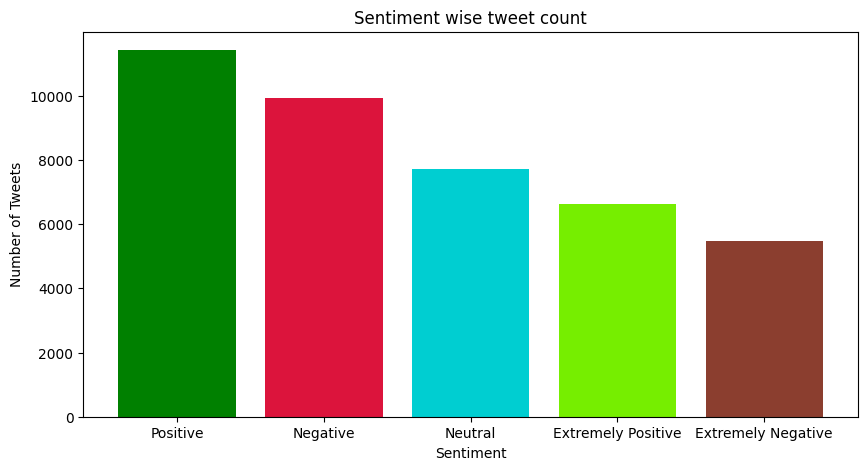

In [13]:
plt.subplots(figsize=(10,5))
plt.bar(sentiments.index,sentiments.values, color=['green','#DC143C','#00CED1','#76EE00','#8B3E2F'])
plt.title("Sentiment wise tweet count")
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [112]:
# giving weight = 2 for extremely positive or negative and 1 for rest
df['weight'] = df['Sentiment'].apply(lambda x: 2 if 'Extremely' in x else 1)
df['label'] = df['Sentiment'].map({'Extremely Positive': 1, 'Positive': 1, 'Extremely Negative': -1, 'Negative': -1, 'Neutral': 0})


In [113]:
df

,OriginalTweet,Sentiment,weight,label
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,1,0
1,advice Talk to your neighbours family to excha...,Positive,1,1
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,1
3,My food stock is not the only one which is emp...,Positive,1,1
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,2,-1
...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,1,0
41153,Response to complaint not provided citing COVI...,Extremely Negative,2,-1
41154,You know itÂs getting tough when @KameronWild...,Positive,1,1
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,1,0


In [16]:
lb = df.label.value_counts()

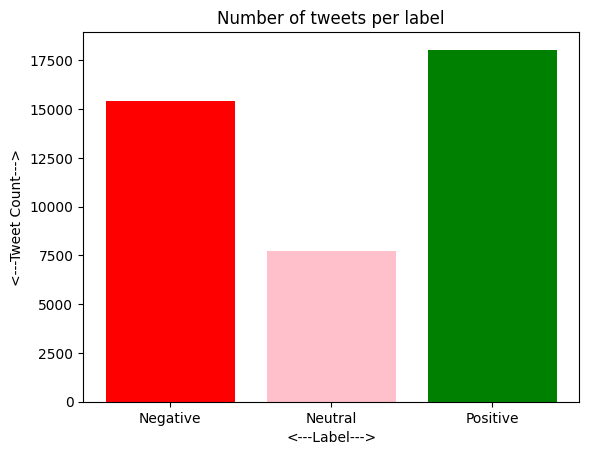

In [17]:
plt.bar(lb.index, lb.values, color=['green','red','pink'])
plt.xticks(lb.index, ['Positive', 'Negative', 'Neutral'])
plt.title('Number of tweets per label')
plt.xlabel('<---Label--->')
plt.ylabel('<---Tweet Count--->')
plt.show()

## Data Preprocessing

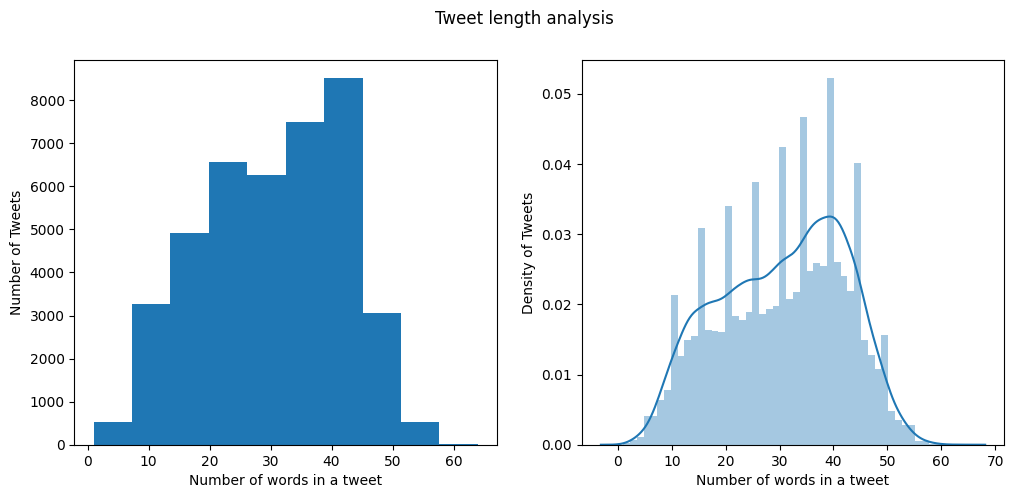

In [18]:
tweet_lengths = df['OriginalTweet'].apply(lambda x: len(x.split()))

plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(tweet_lengths)
plt.suptitle("Tweet length analysis")
plt.xlabel("Number of words in a tweet")
plt.ylabel("Number of Tweets")

plt.subplot(1,2,2)
sns.distplot(tweet_lengths)
plt.xlabel("Number of words in a tweet")
plt.ylabel("Density of Tweets")
plt.show()

In [19]:
import re

In [114]:
# function for initial textual preprocessing:
def preprocessing(x):
    # helper functions:
    def remove_hashtags(text): return re.sub(r'#\w*', ' ' , text)
    def remove_mentions(text): return re.sub(r'@\w*', ' ' , text)
    def remove_urls(text): return re.sub(r'https?://\S+', ' ', text)
    def remove_apostrophe(text): return re.sub(r"'s\b", "", text)
    def remove_special_chars(text): return re.sub(r"[^a-zA-Z0-9\s]", ' ', text)
    def remove_numbers(text): return re.sub(r'[\d]', ' ', text)
    def remove_formatting_symbols(text): return re.sub(r"[\r\n]+",'',text)
    def remove_escape_characters(text): return re.sub(r"\\",'',text)
    def remove_extra_spaces(text): return re.sub(r"\s{2,}",' ',text)
    x=x.apply(remove_hashtags)
    x=x.apply(remove_mentions)
    x=x.apply(remove_urls)
    x=x.apply(remove_apostrophe)
    x=x.apply(remove_special_chars)
    x=x.apply(remove_numbers)
    x=x.apply(remove_formatting_symbols)
    x=x.apply(remove_escape_characters)
    x=x.apply(remove_extra_spaces)
    x=x.str.lower()
    return x

In [115]:
df['OriginalTweet']=preprocessing(df['OriginalTweet'])
df

,OriginalTweet,Sentiment,weight,label
0,and and,Neutral,1,0
1,advice talk to your neighbours family to excha...,Positive,1,1
2,coronavirus australia woolworths to give elder...,Positive,1,1
3,my food stock is not the only one which is emp...,Positive,1,1
4,me ready to go at supermarket during the outbr...,Extremely Negative,2,-1
...,...,...,...,...
41152,airline pilots offering to stock supermarket s...,Neutral,1,0
41153,response to complaint not provided citing covi...,Extremely Negative,2,-1
41154,you know it s getting tough when is rationing ...,Positive,1,1
41155,is it wrong that the smell of hand sanitizer i...,Neutral,1,0


### Stemming and lemmatization

In [171]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [172]:
# function for stemming:
def stemming(df):
    def stem_func(text):
        stemmer=PorterStemmer()
        tok=word_tokenize(text)
        return ' '.join([stemmer.stem(word) for word in tok])
    df_temp=df.copy()
    df_temp['OriginalTweet']=df_temp['OriginalTweet'].apply(stem_func)
    return df_temp

In [173]:
stem_df=stemming(df)
stem_df

,OriginalTweet,Sentiment,weight,label
0,and and,Neutral,1,0
1,advic talk to your neighbour famili to exchang...,Positive,1,1
2,coronaviru australia woolworth to give elderli...,Positive,1,1
3,my food stock is not the onli one which is emp...,Positive,1,1
4,me readi to go at supermarket dure the outbrea...,Extremely Negative,2,-1
...,...,...,...,...
41152,airlin pilot offer to stock supermarket shelv ...,Neutral,1,0
41153,respons to complaint not provid cite covid rel...,Extremely Negative,2,-1
41154,you know it s get tough when is ration toilet ...,Positive,1,1
41155,is it wrong that the smell of hand sanit is st...,Neutral,1,0


In [23]:
# Function for lemmatization:
def lemmatization(df):
    def lemma_func(text):
        lemma=WordNetLemmatizer()
        tok=word_tokenize(text)
        return ' '.join([lemma.lemmatize(word) for word in tok])
    df_temp=df.copy()
    df_temp['OriginalTweet']=df_temp['OriginalTweet'].apply(lemma_func)
    return df_temp

In [24]:
lemma_df=lemmatization(df)
lemma_df

,OriginalTweet,Sentiment,weight,label
0,and and,Neutral,1,0
1,advice talk to your neighbour family to exchan...,Positive,1,1
2,coronavirus australia woolworth to give elderl...,Positive,1,1
3,my food stock is not the only one which is emp...,Positive,1,1
4,me ready to go at supermarket during the outbr...,Extremely Negative,2,-1
...,...,...,...,...
41152,airline pilot offering to stock supermarket sh...,Neutral,1,0
41153,response to complaint not provided citing covi...,Extremely Negative,2,-1
41154,you know it s getting tough when is rationing ...,Positive,1,1
41155,is it wrong that the smell of hand sanitizer i...,Neutral,1,0


In [174]:
import random
num=random.randint(0,20)
print("Original Text:", df.iloc[num,0])
print('-'*100)
print("Stemmed Text:", stem_df.iloc[num,0])
print('-'*100)
print("Lemmatized Text:", lemma_df.iloc[num,0])
print('='*150)

Original Text: for corona prevention we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes also we should prefer online shopping from our home it time to fight against covid 
----------------------------------------------------------------------------------------------------
Stemmed Text: for corona prevent we should stop to buy thing with the cash and should use onlin payment method becaus corona can spread through the note also we should prefer onlin shop from our home it time to fight against covid
----------------------------------------------------------------------------------------------------
Lemmatized Text: month crowding supermarket restaurant however reducing hour closing mall mean everyone using entrance dependent single supermarket


Lemmatized text is most similar to original text and gives proper context to the data. Hence, I am using the lemmatized data

In [25]:
# function for removing stopwords:
def remove_stopwords(df):
    def func(text):
        stop_words = set(stopwords.words('english'))
        tok=word_tokenize(text)
        return ' '.join([word for word in tok if word not in stop_words])
    df['OriginalTweet']=df['OriginalTweet'].apply(func)
    idx=df.loc[df.OriginalTweet==''].index
    df.drop(idx,inplace=True)
    return df

In [26]:
# stopword removal on lemmatized data:
lemma_clean_df=remove_stopwords(lemma_df)
lemma_clean_df


,OriginalTweet,Sentiment,weight,label
1,advice talk neighbour family exchange phone nu...,Positive,1,1
2,coronavirus australia woolworth give elderly d...,Positive,1,1
3,food stock one empty please panic enough food ...,Positive,1,1
4,ready go supermarket outbreak paranoid food st...,Extremely Negative,2,-1
5,news region first confirmed covid case came su...,Positive,1,1
...,...,...,...,...
41152,airline pilot offering stock supermarket shelf...,Neutral,1,0
41153,response complaint provided citing covid relat...,Extremely Negative,2,-1
41154,know getting tough rationing toilet paper mart...,Positive,1,1
41155,wrong smell hand sanitizer starting turn,Neutral,1,0


## Classification models : Best model Logistic Regression

### Neural network model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X_train, X_test, y_train, y_test, weight_train, weight_test = train_test_split(lemma_clean_df['OriginalTweet'], lemma_clean_df['label'], lemma_clean_df['weight'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Add weight to the TF-IDF vectors
X_train_tfidf_weighted = X_train_tfidf.multiply(weight_train.values.reshape(-1, 1))
X_test_tfidf_weighted = X_test_tfidf.multiply(weight_test.values.reshape(-1, 1))

In [ ]:
# # Scale the input data using MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train_tfidf_weighted.toarray())
# X_test = scaler.transform(X_test_tfidf_weighted.toarray())

In [ ]:
# X_train = X_train_tfidf_weighted.toarray()
# X_test = X_test_tfidf_weighted.toarray()
X_train = X_train_tfidf.toarray()
X_test = X_test_tfidf.toarray()

In [ ]:
# Create the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=20, batch_size=100, verbose=1)

In [ ]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

### Logistic Regression Model

In [134]:
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [28]:
x_train,x_test,y_train,y_test = train_test_split(lemma_clean_df.OriginalTweet, lemma_clean_df.label,test_size=0.2,random_state=1)

In [32]:
# function for vectorization:
def vectorize(x_train,x_test):
    tfidf_vector=TfidfVectorizer(stop_words='english')
    tfidf_x_train=tfidf_vector.fit_transform(x_train.values)
    tfidf_x_test=tfidf_vector.transform(x_test.values)
    return tfidf_x_train, tfidf_x_test

In [33]:
# vectorizing lemmatized data:
x_train_vec, x_test_vec=vectorize(x_train, x_test)


In [34]:
# Model Creation
lr=LogisticRegression()
lr.fit(x_train_vec, y_train)

LogisticRegression()

In [35]:
print("Training Score:", lr.score(x_train_vec,y_train)*100)

Training Score: 89.7488140128938


In [36]:
y_pred = lr.predict(x_test_vec)

In [37]:
acc=accuracy_score(y_test,y_pred)
print(f"Testing score: {acc*100}")

Testing score: 79.39423427806837


In [38]:
# function to plot confusion matrix:
def plot_cm(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    label=['Negative','Neutral','Positive']
    plt.subplots(figsize=(3.5,3.5))
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='BuGn', cbar=False, xticklabels=label, yticklabels=label)
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.show()

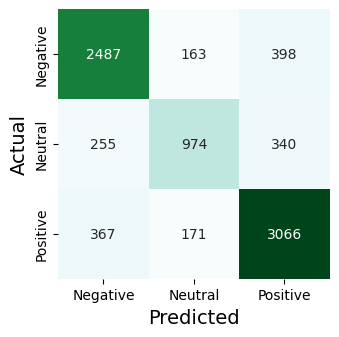

In [39]:
plot_cm(y_test,y_pred)

In [40]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [41]:
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1-score:", f1*100)

Precision: 79.20397028257116
Recall: 79.39423427806837
F1-score: 79.16245778979714


### Random Forest CLassifier

In [236]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, y_train, y_test = train_test_split(lemma_clean_df['OriginalTweet'], lemma_clean_df['label'], test_size=0.2, random_state=42)


In [238]:
# convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [253]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators=80, random_state=42)
rf.fit(X_train_vec, y_train)

RandomForestClassifier(n_estimators=80, random_state=42)

In [254]:
# Evaluate the performance of the classifier
print("Training Score:", rf.score(X_train_vec,y_train)*100)

Training Score: 99.99087702226007


In [256]:
# make predictions on test data
y_pred_rf = rf.predict(X_test_vec)

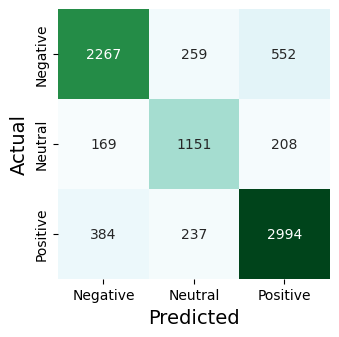

In [249]:
plot_cm(y_test,y_pred_rf)

In [255]:
print(f"Testing score: {accuracy_score(y_test,y_pred_rf)*100}")

Testing score: 77.99537769127843


In [241]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.80      0.74      0.77      3078
           0       0.70      0.75      0.73      1528
           1       0.80      0.83      0.81      3615

    accuracy                           0.78      8221
   macro avg       0.77      0.77      0.77      8221
weighted avg       0.78      0.78      0.78      8221



### SVC model

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC(kernel='linear')
classifier.fit(x_train_vec, y_train)

SVC(kernel='linear')

In [ ]:
# Evaluate the performance of the classifier
print("Training Score:", classifier.score(x_train_vec,y_train)*100)

Training Score: 91.29059725094271


SVM gives a good training score but it takes too long to train 

In [ ]:
y_pred_svm = classifier.predict(x_test_vec)

In [ ]:
print(f"Testing score: {accuracy_score(y_test,y_pred_svm)*100}")

Testing score: 80.08758058630336


Testing score is almost the same as logistic regression

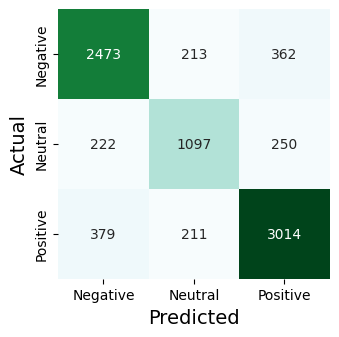

In [ ]:
plot_cm(y_test,y_pred_svm)

In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

In [ ]:
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1-score:", f1*100)

Precision: 80.03181840498777
Recall: 80.08758058630336
F1-score: 80.05555004070925


### Gradient boosting model

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
# Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train_vec, y_train)

GradientBoostingClassifier()

In [67]:
# Evaluate the performance of the classifier
print("Training Score:", gbc.score(x_train_vec,y_train)*100)

Training Score: 66.79540201921907


In [68]:
y_pred_gbc = gbc.predict(x_test_vec)

In [69]:
print(f"Testing score: {accuracy_score(y_test,y_pred_gbc)*100}")

Testing score: 64.48120666585574


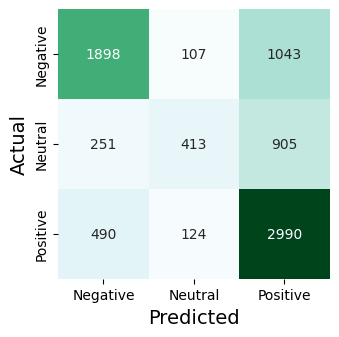

In [70]:
plot_cm(y_test,y_pred_gbc)

In [71]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_gbc, average='weighted')
recall = recall_score(y_test, y_pred_gbc, average='weighted')
f1 = f1_score(y_test, y_pred_gbc, average='weighted')

In [72]:
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1-score:", f1*100)

Precision: 65.44965431289287
Recall: 64.48120666585574
F1-score: 62.56151255163977


### Decision tree classifier model

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
# Train Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth = 100)
dtc.fit(x_train_vec, y_train)

DecisionTreeClassifier(max_depth=100)

In [74]:
# Evaluate the performance of the classifier
print("Training Score:", dtc.score(x_train_vec,y_train)*100)

Training Score: 88.95815594209951


In [75]:
y_pred_dtc = dtc.predict(x_test_vec)

In [76]:
print(f"Testing score: {accuracy_score(y_test,y_pred_dtc)*100}")

Testing score: 63.04585816810607


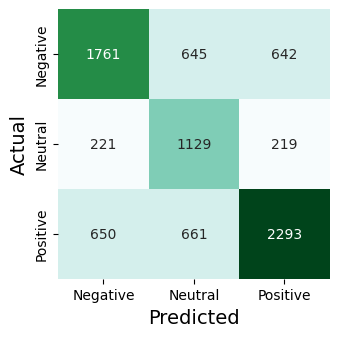

In [77]:
plot_cm(y_test,y_pred_dtc)

In [78]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_dtc, average='weighted')
recall = recall_score(y_test, y_pred_dtc, average='weighted')
f1 = f1_score(y_test, y_pred_dtc, average='weighted')

In [79]:
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1-score:", f1*100)

Precision: 65.52688337454887
Recall: 63.04585816810607
F1-score: 63.50171558244904


After all these classifiers we see that Logistic Regression works the best.

### LSTM Model

In [102]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 22.6 MB/s eta 0:00:00


In [118]:
from string import punctuation
from nltk.stem import WordNetLemmatizer
import contractions
import copy

In [202]:
# this is the preprocessed data from earlier.
df

,OriginalTweet,Sentiment,weight,label
0,and and,Neutral,1,0
1,advice talk to your neighbours family to excha...,Positive,1,1
2,coronavirus australia woolworths to give elder...,Positive,1,1
3,my food stock is not the only one which is emp...,Positive,1,1
4,me ready to go at supermarket during the outbr...,Extremely Negative,2,-1
...,...,...,...,...
41152,airline pilots offering to stock supermarket s...,Neutral,1,0
41153,response to complaint not provided citing covi...,Extremely Negative,2,-1
41154,you know it s getting tough when is rationing ...,Positive,1,1
41155,is it wrong that the smell of hand sanitizer i...,Neutral,1,0


In [203]:
def splitting(text):
  l = text.split(' ')
  return l

In [204]:
df2 = copy.deepcopy(df)

In [205]:
df2['OriginalTweet'] = df2['OriginalTweet'].apply(splitting)
df2.head()

,OriginalTweet,Sentiment,weight,label
0,"[, and, and, ]",Neutral,1,0
1,"[advice, talk, to, your, neighbours, family, t...",Positive,1,1
2,"[coronavirus, australia, woolworths, to, give,...",Positive,1,1
3,"[my, food, stock, is, not, the, only, one, whi...",Positive,1,1
4,"[me, ready, to, go, at, supermarket, during, t...",Extremely Negative,2,-1


In [206]:
X_train,X_test,y_train,y_test = train_test_split(df2.OriginalTweet,df["label"],test_size=0.2, random_state=42, stratify=df["label"])

In [207]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((32925,), (8232,), (32925,), (8232,))

In [208]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer

In [209]:
# Reshape column 
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

In [210]:
one_hot_encode = OneHotEncoder(sparse=False)

In [211]:
y_train = one_hot_encode.fit_transform(y_train)
y_test = one_hot_encode.transform(y_test)

In [212]:
X_train = X_train.to_list()
X_test = X_test.to_list()

In [213]:
# Converting the text to sequenctial numerical features for the machine learning model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [214]:
max_input_length = np.max([len(x) for x in X_train])

In [215]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding= "post", maxlen = max_input_length)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding= "post", maxlen = max_input_length)

In [216]:
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Bidirectional, SpatialDropout1D
from keras.models import Sequential
from keras.optimizers import Adam

In [218]:
max_vocab = len(tokenizer.word_index) + 1

In [220]:
model = Sequential()
model.add(Input((max_input_length,),name= "input_layer"))
model.add(Embedding(max_vocab,100,mask_zero = True, name = "embedding_layer"))
model.add(SpatialDropout1D(0.5, name = "dropout_layer"))
model.add(Bidirectional(LSTM(100, dropout = 0.5, recurrent_dropout = 0.2, return_state = False, 
                                name = "lstm_layer")))
model.add(Dense(3, activation = "softmax"))

In [221]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [222]:
model.fit(X_train,y_train, batch_size = 512, epochs = 10, validation_data = (X_test,y_test))

Epoch 1/10
65/65 [==============================] - 152s 2s/step - loss: 0.9642 - accuracy: 0.5048 - val_loss: 0.7906 - val_accuracy: 0.6704
Epoch 2/10
65/65 [==============================] - 150s 2s/step - loss: 0.6650 - accuracy: 0.7383 - val_loss: 0.5488 - val_accuracy: 0.7994
Epoch 3/10
65/65 [==============================] - 148s 2s/step - loss: 0.4487 - accuracy: 0.8397 - val_loss: 0.4695 - val_accuracy: 0.8331
Epoch 4/10
65/65 [==============================] - 144s 2s/step - loss: 0.3383 - accuracy: 0.8867 - val_loss: 0.4299 - val_accuracy: 0.8526
Epoch 5/10
65/65 [==============================] - 149s 2s/step - loss: 0.2741 - accuracy: 0.9095 - val_loss: 0.4179 - val_accuracy: 0.8601
Epoch 6/10
65/65 [==============================] - 146s 2s/step - loss: 0.2296 - accuracy: 0.9261 - val_loss: 0.4116 - val_accuracy: 0.8621
Epoch 7/10
65/65 [==============================] - 149s 2s/step - loss: 0.2013 - accuracy: 0.9362 - val_loss: 0.4180 - val_accuracy: 0.8658
Epoch 8/10
65

In [234]:
y_pred = model.predict(X_test)

258/258 [==============================] - 13s 45ms/step


In [162]:
result=np.argmax(y_pred,axis=-1)
original = np.argmax(y_test,axis=-1)

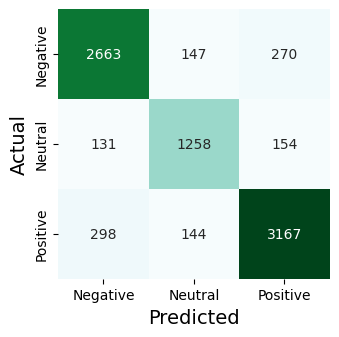

In [168]:
plot_cm(original,result)

In [169]:
# Calculate precision, recall, and F1-score
precision = precision_score(original, result, average='weighted')
recall = recall_score(original, result, average='weighted')
f1 = f1_score(original, result, average='weighted')

In [170]:
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1-score:", f1*100)

Precision: 86.11111281981405
Recall: 86.10301263362487
F1-score: 86.1066421942166


In [175]:
print(f"Testing score: {accuracy_score(original,result)*100}")

Testing score: 86.10301263362487


### Testing function

In [ ]:
# function for initial textual preprocessing:
def preprocessing(x):
    # helper functions:
    def remove_hashtags(text): return re.sub(r'#\w*', ' ' , text)
    def remove_mentions(text): return re.sub(r'@\w*', ' ' , text)
    def remove_urls(text): return re.sub(r'https?://\S+', ' ', text)
    def remove_apostrophe(text): return re.sub(r"'s\b", "", text)
    def remove_special_chars(text): return re.sub(r"[^a-zA-Z0-9\s]", ' ', text)
    def remove_numbers(text): return re.sub(r'[\d]', ' ', text)
    def remove_formatting_symbols(text): return re.sub(r"[\r\n]+",'',text)
    def remove_escape_characters(text): return re.sub(r"\\",'',text)
    def remove_extra_spaces(text): return re.sub(r"\s{2,}",' ',text)
    x=x.apply(remove_hashtags)
    x=x.apply(remove_mentions)
    x=x.apply(remove_urls)
    x=x.apply(remove_apostrophe)
    x=x.apply(remove_special_chars)
    x=x.apply(remove_numbers)
    x=x.apply(remove_formatting_symbols)
    x=x.apply(remove_escape_characters)
    x=x.apply(remove_extra_spaces)
    x=x.str.lower()
    return x

In [242]:
def input_processor(text):
    # helper functions:
    def remove_hashtags(text): return re.sub(r'#\w*', ' ' , text)
    def remove_mentions(text): return re.sub(r'@\w*', ' ' , text)
    def remove_urls(text): return re.sub(r'https?://\S+', ' ', text)
    def remove_apostrophe(text): return re.sub(r"'s\b", "", text)
    def remove_special_chars(text): return re.sub(r"[^a-zA-Z0-9\s]", ' ', text)
    def remove_numbers(text): return re.sub(r'[\d]', ' ', text)
    def remove_formatting_symbols(text): return re.sub(r"[\r\n]+",'',text)
    def remove_escape_characters(text): return re.sub(r"\\",'',text)
    def remove_extra_spaces(text): return re.sub(r"\s{2,}",' ',text)
    text=remove_hashtags(text)
    text=remove_mentions(text)
    text=remove_urls(text)
    text=remove_apostrophe(text)
    text=remove_special_chars(text)
    text=remove_numbers(text)
    text=remove_formatting_symbols(text)
    text=remove_escape_characters(text)
    text=remove_extra_spaces(text)
    text= str.lower(text)
    text = text.split(' ')
    text = tokenizer.texts_to_sequences([text])
    text = tf.keras.preprocessing.sequence.pad_sequences(text, padding= "post", maxlen = max_input_length)
    return text

In [261]:
input_text = "There are so many unknowns about what's in them and the potential long-term effects they can have on our bodies. I don't trust the pharmaceutical companies that manufacture these vaccines, and I don't trust the government that promotes them. It's all about money and power, not about keeping people healthy. I refuse to put my health and the health of my loved ones at risk by getting vaccinated. We need to question everything and do our own research before blindly following what we're told to do."

In [262]:
input = input_processor(input_text)

In [263]:
pred = model.predict(input)

1/1 [==============================] - 0s 120ms/step


In [264]:
result=np.argmax(pred,axis=-1)
print(result)

[2]
